In [1]:
# importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# importing the country dataset
country_data = pd.read_csv('C:/Users/Sharath Jois/Downloads/Country-data.csv')

In [3]:
#Checking the dimension of the dataset
country_data.shape

(167, 10)

In [4]:
#overviewing the dataset
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
#Checking for null values
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
#Getting the description of the dataset
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
#Checking the info of the dataset
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


As the 3 columns exports,health and imports are in percentage wrt GDPP we need to bring the data from these 3 columns to ordinary data

In [8]:
#multiplying the data with the gdpp data to bring the % data to ordinary form
country_data['exports'] = country_data['exports'] * country_data['gdpp']/100
country_data['health'] = country_data['health'] * country_data['gdpp']/100
country_data['imports'] = country_data['imports'] * country_data['gdpp']/100

In [9]:
#Overviewing the data
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [10]:
#Getting the description of the data
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
# Checking the info
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


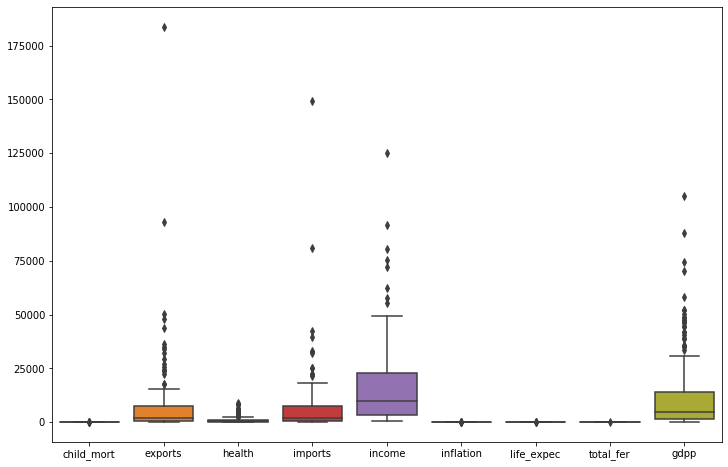

In [12]:
#plotting the boxplot to check for outliers
plt.figure(figsize = (12,8))
sns.boxplot(data = country_data)

In [13]:
#cheking the data wrt percentile to detect the outliers
country_data.describe(percentiles = [.05,.25,.50,.75,.90,.95])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,70.468800,26.715920,169.281000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


As we can observe there are outliers in the dataset, we need to work on the outliers, which we'll do in the later part

In [14]:
#Checking the correlation between the columns in the dataset
country_data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


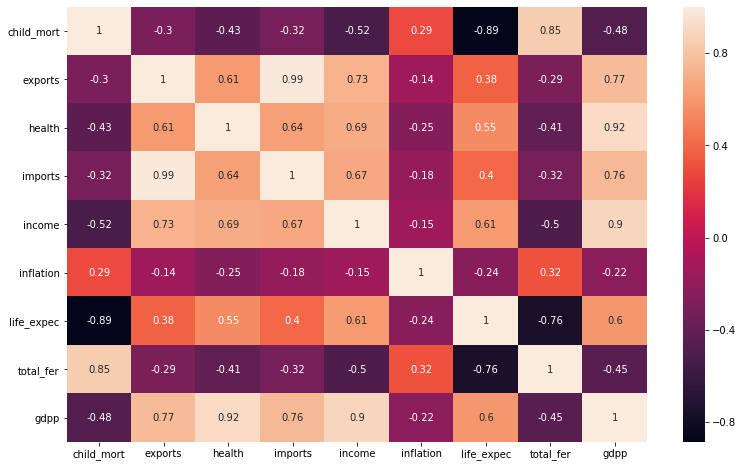

In [156]:
# plotting the correlation matrix/ visualizing the correlation matrix
plt.figure(figsize = (13,8))
sns.heatmap(country_data.corr(), annot = True)
plt.show()

As the values in the dataset are of different magnitude we need to scale the data for further processing of data

In [16]:
# importing the StandardScalar library to scale the data
from sklearn.preprocessing import StandardScaler
country_data_pca = country_data.drop('country', axis = 1)

In [17]:
# droping the categorical column before scalling
country_data_pca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [18]:
#Checking the dimension of the dataset
country_data_pca.shape

(167, 9)

In [19]:
#scaling the data
standard_scaler = StandardScaler()
country_data_scaled = standard_scaler.fit_transform(country_data_pca)

In [20]:
#checking the shape of the dataset
country_data_scaled.shape

(167, 9)

In [21]:
# putting the data in a dataframe, and visualizing it
country_data_scaled_df = pd.DataFrame(country_data_scaled)
country_data_scaled_df.columns = ['child_mort', 'exports', 'health','imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
country_data_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [22]:
#Getting the description of the dataset
country_data_scaled_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,9.174298e-17,-2.260334e-17,3.589943e-17,-7.512288e-17,8.376533e-17,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-4.140371e-01,-5.812404e-01,-4.491604e-01,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-3.891452e-01,-5.446513e-01,-4.055539e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-3.149097e-01,-4.091560e-01,-3.097338e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,-7.958645e-03,-4.442811e-02,7.713036e-02,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,9.839814e+00,4.235432e+00,9.716681e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


In [23]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)

In [24]:
#fitting the data to perform PCA
pca.fit(country_data_scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
#checking the PCA components
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [26]:
#checking the variance ration of the Principal components
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

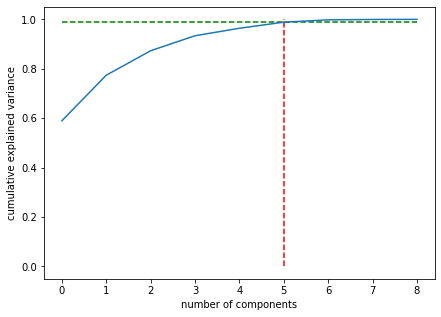

In [153]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (7,5))
plt.vlines(x=5, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.99, xmax=8, xmin=0, colors="g", linestyles="--")

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

as we can see from the above graph about 99% of data is explained by the top 5 components

In [29]:
#creating a dataframe consisting of top 5 principal components and the features fromthe country dataset
country_data_pca1 = pd.DataFrame({'Feature': country_data_pca.columns,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4]})
country_data_pca1

,Feature,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501


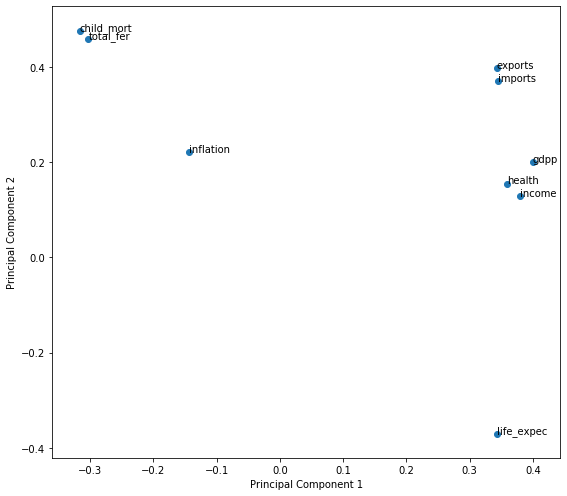

In [146]:
#Ploting the principal components 
%matplotlib inline
fig = plt.figure(figsize = (8,7))
plt.scatter(country_data_pca1.PC1, country_data_pca1.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(country_data_pca1.Feature):
    plt.annotate(txt, (country_data_pca1.PC1[i],country_data_pca1.PC2[i]))
plt.tight_layout()
plt.show()

from the above plot we can get that for life expectency, gdpp, health and income have more value wrt PC1, child mort, total fertility and inflation has more PC2 value and for imports and exports have both PC1 and PC2 high value

In [31]:
# importing the PCA library for performing dimentionality reduction
from sklearn.decomposition import IncrementalPCA

In [32]:
# taking only top 5 components
pca_final = IncrementalPCA(n_components=5)

In [33]:
#fitting and transforming the dataset
df_country_pca = pca_final.fit_transform(country_data_scaled_df)

In [34]:
#checking the shape of the dataset
df_country_pca.shape

(167, 5)

In [35]:
#getting the transpose of the dataset
df_country_pca_T = df_country_pca.transpose()

In [36]:
#checking the correlation coefficient
corrmat = np.corrcoef(df_country_pca_T)

In [37]:
#checking teh shape
corrmat.shape

(5, 5)

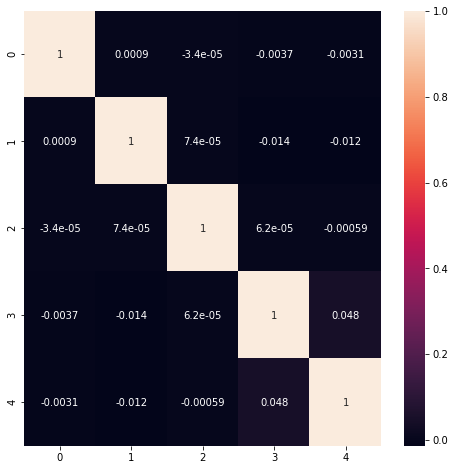

In [38]:
#plotting the correlation dataset after performing the PCA 
plt.figure(figsize=[8,8])
sns.heatmap(corrmat, annot=True)

from the above graph we can say that the above matrix is approximately diagonal matrix with only values 1 in the diagonal and 0's on both the sides of the diagonal

In [39]:
#creating the dataframe for the PC's
PCA_countrydata_df = pd.DataFrame({'PC1':df_country_pca_T[0],'PC2':df_country_pca_T[1],'PC3':df_country_pca_T[2],'PC4':df_country_pca_T[3],'PC5':df_country_pca_T[4]})

In [40]:
#checking the dimenstion of the dataset
PCA_countrydata_df.shape

(167, 5)

In [41]:
#checking the head of the dataset
PCA_countrydata_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


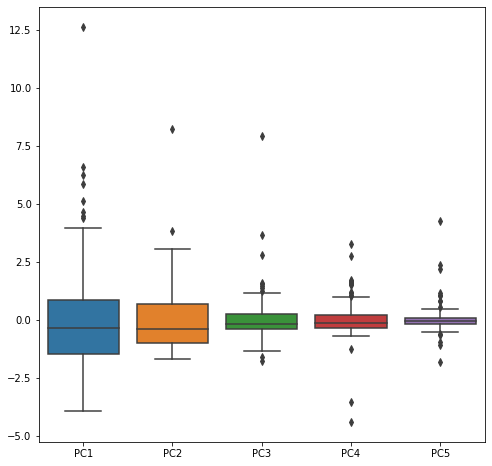

In [42]:
#plotting the PC's from the above created dataset
plt.figure(figsize = (8,8))
sns.boxplot(data = PCA_countrydata_df)

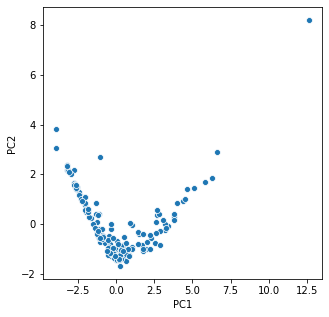

In [43]:
#plotting the PC1 and PC2 data
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'PC1',y = 'PC2', data = PCA_countrydata_df )

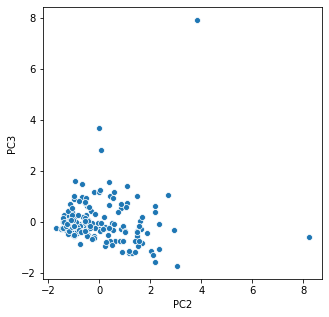

In [148]:
#ploting the PC2 and PC3 data
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'PC2',y = 'PC3', data = PCA_countrydata_df )

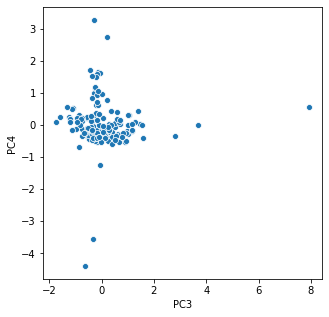

In [44]:
#ploting the PC3 and PC4 data
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'PC3',y = 'PC4', data = PCA_countrydata_df )

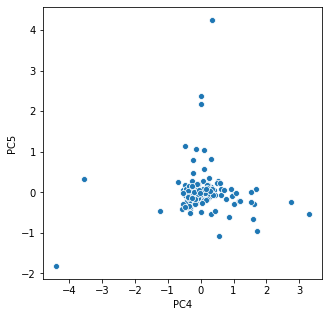

In [45]:
#Plotting PC4 and PC5 data
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'PC4',y = 'PC5', data = PCA_countrydata_df )

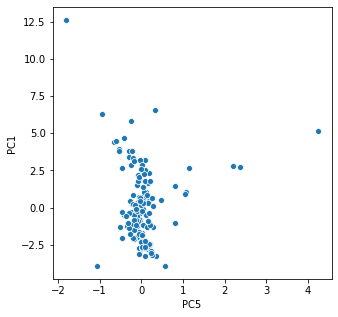

In [149]:
#Plotting PC5 and PC1 data
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'PC5',y = 'PC1', data = PCA_countrydata_df )

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

In [46]:
# importing the libraries for performing Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

As we can see the hopkins stastics value is coming more than .5 the data is good for clustering

In [47]:
hopkins(PCA_countrydata_df)

0.9422235886710641

In [48]:
#Checking the dimension of the data
PCA_countrydata_df.shape

(167, 5)

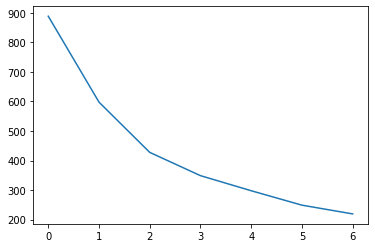

In [49]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(PCA_countrydata_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

From the above graph we can consider 3 as the k value

In [50]:
    # silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(PCA_countrydata_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(PCA_countrydata_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.48066046782755917
For n_clusters=3, the silhouette score is 0.45415128979715086
For n_clusters=4, the silhouette score is 0.4619522027493683
For n_clusters=5, the silhouette score is 0.46500328500357135
For n_clusters=6, the silhouette score is 0.4322264994291297
For n_clusters=7, the silhouette score is 0.35495412483438127
For n_clusters=8, the silhouette score is 0.31533982920285697


In [51]:
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(PCA_countrydata_df)
    sse_.append([k, silhouette_score(PCA_countrydata_df, kmeans.labels_)])


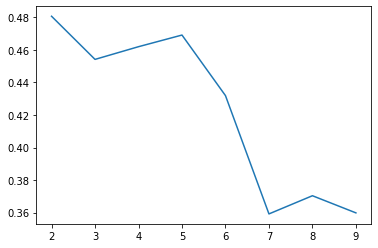

In [52]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

In [53]:
#considering the k value as 3 and fitting the model
country_model = KMeans(n_clusters=3, max_iter=50)
country_model.fit(PCA_countrydata_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
#checking the data labels
country_model.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [55]:
#creating a new column PCA_countrydata_df dataframe and adding the newly created data labels into it
PCA_countrydata_df['cluster_id'] = country_model.labels_
PCA_countrydata_df.head(5)

,PC1,PC2,PC3,PC4,PC5,cluster_id
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


In [56]:
#counting the distributing of data amoung the clusters
PCA_countrydata_df['cluster_id'].value_counts()

1    91
2    48
0    28
Name: cluster_id, dtype: int64

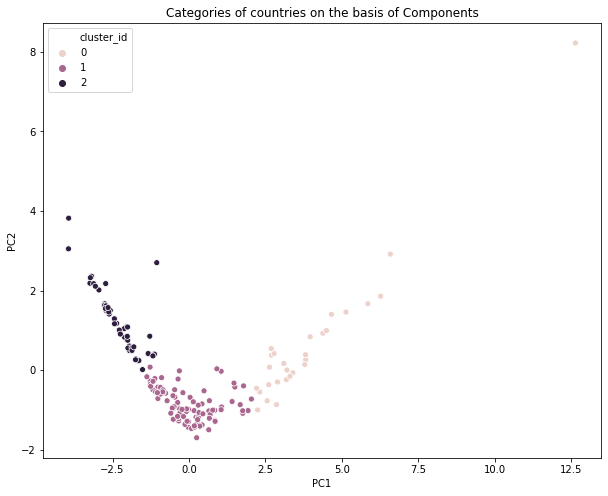

In [151]:
#Plotting the distribution of PC1 and PC2 from the PCA_countrydata_df dataframe 
fig = plt.figure(figsize = (10,8))
sns.scatterplot(x='PC1',y='PC2',hue='cluster_id',legend='full',data=PCA_countrydata_df)

plt.title('Categories of countries on the basis of Components')
plt.show()

In [58]:
#merging the old dataframe consisting of country names and all the other columns into the newly created labeled dataframe
PCA_countrydata_df1 = pd.merge(country_data,PCA_countrydata_df,left_index = True, right_index = True)

In [59]:
#checking the dataset 
PCA_countrydata_df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


In [89]:
#Dropping the Principal components columns from the dataframe
final_country_data = PCA_countrydata_df1.drop(['PC1','PC2','PC3','PC4','PC5'], axis = 1)
final_country_data.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,2
1,Albania,16.6,1145.200,267.8950,1987.740,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,1712.640,185.9820,1400.440,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.000,735.6600,7185.800,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,1946.700,834.3000,1648.000,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,669.760,141.6800,1458.660,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,10276.200,4530.8700,10847.100,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,24059.700,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,3171.120,343.3920,1208.880,16000,13.800,69.1,1.92,5840,1


In [61]:
#Checking the shape of the dataframe
final_country_data.shape

(167, 11)

In [62]:
#finding the mean of each and every column in the dataframe 
child_mort_mean = pd.DataFrame(final_country_data.groupby(['cluster_id']).child_mort.mean())
exports_mean = pd.DataFrame(final_country_data.groupby(['cluster_id']).exports.mean())
health_mean = pd.DataFrame(final_country_data.groupby(['cluster_id']).health.mean())
imports_mean = pd.DataFrame(final_country_data.groupby(['cluster_id']).imports.mean())
income_mean = pd.DataFrame(final_country_data.groupby(['cluster_id']).income.mean())
inflation_mean = pd.DataFrame(final_country_data.groupby(['cluster_id']).inflation.mean())
life_expec_mean = pd.DataFrame(final_country_data.groupby(['cluster_id']).life_expec.mean())
total_fer_mean = pd.DataFrame(final_country_data.groupby(['cluster_id']).total_fer.mean())
gdpp_mean = pd.DataFrame(final_country_data.groupby(['cluster_id']).gdpp.mean())

In [63]:
# concating all the data into a single dataframe
Country_data_mean = pd.concat([gdpp_mean,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean], axis = 1)

In [64]:
#visualizing the dataset
Country_data_mean

,gdpp,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
cluster_id,,,,,,,,,
0,48114.285714,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714
1,7979.912088,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055
2,1909.208333,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083


In [65]:
#Replacing the cluster ids with the segment names
Country_data_mean.rename(index = {2: 'Under developed Countries'}, inplace = True)
Country_data_mean.rename(index = {1: 'Developing Countries'}, inplace = True)
Country_data_mean.rename(index = {0: 'Developed Countries'}, inplace = True)

In [66]:
# viasualizing the dataset
Country_data_mean

,gdpp,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
cluster_id,,,,,,,,,
Developed Countries,48114.285714,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714
Developing Countries,7979.912088,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055
Under developed Countries,1909.208333,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083


Text(0.5, 1.0, 'Countries wrt GDPP')

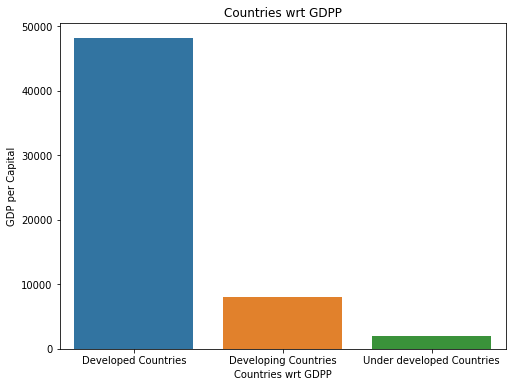

In [67]:
#plottin the country v/s GDPP data
plt.figure(figsize = (8,6))
sns.barplot(x = Country_data_mean.index, y = 'gdpp', data = Country_data_mean)
plt.xlabel('Countries wrt GDPP')
plt.ylabel('GDP per Capital')
plt.title('Countries wrt GDPP')


Text(0.5, 1.0, 'Countries wrt child_mort')

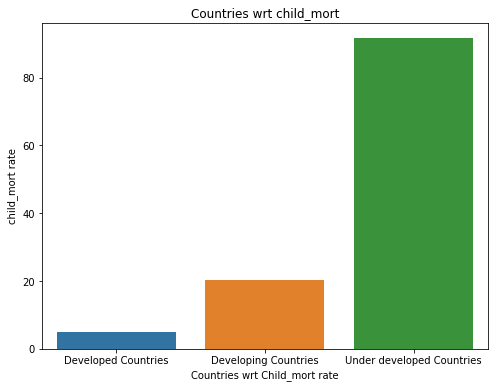

In [90]:
#Plotting country V/s child mort data
plt.figure(figsize = (8,6))
sns.barplot(x = Country_data_mean.index, y = 'child_mort', data = Country_data_mean)
plt.xlabel('Countries wrt Child_mort rate')
plt.ylabel('child_mort rate')
plt.title('Countries wrt child_mort')


Text(0.5, 1.0, 'Countries wrt Net income per person')

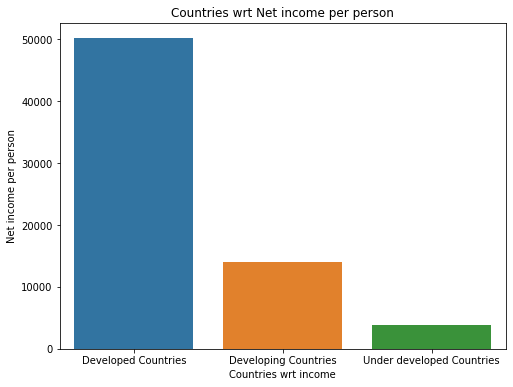

In [91]:
# plotting the country v/s net income data
plt.figure(figsize = (8,6))
sns.barplot(x = Country_data_mean.index, y = 'income', data = Country_data_mean)
plt.xlabel('Countries wrt income')
plt.ylabel('Net income per person')
plt.title('Countries wrt Net income per person')


Text(0.5, 1.0, 'Countries wrt Life Expectency rate')

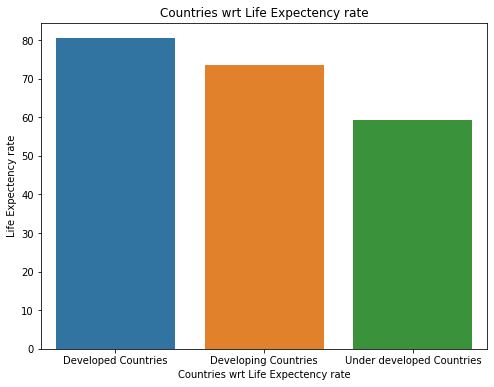

In [92]:
#plotting the country v/s life expectency data
plt.figure(figsize = (8,6))
sns.barplot(x = Country_data_mean.index, y = 'life_expec', data = Country_data_mean)
plt.xlabel('Countries wrt Life Expectency rate')
plt.ylabel('Life Expectency rate')
plt.title('Countries wrt Life Expectency rate')


In [93]:
#creating a new column called segment
final_country_data['Segment'] = final_country_data['cluster_id'].apply({2 : 'Under developed Countries',1 : 'Developing Countries',0 : 'Developed Countries'}.get)

In [94]:
# checking the dataset
final_country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Segment
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,Under developed Countries
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,Developing Countries
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,Developing Countries
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,Under developed Countries
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,Developing Countries


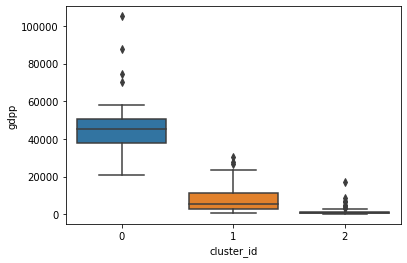

In [95]:
#checking the distriution of gdpp data wrt clusters by putting the boxplot
sns.boxplot(x = 'cluster_id', y = 'gdpp', data = final_country_data)

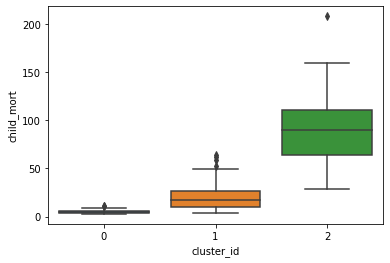

In [96]:
#checking the distriution of child mort data wrt clusters by putting the boxplot
sns.boxplot(x = 'cluster_id', y = 'child_mort', data = final_country_data)

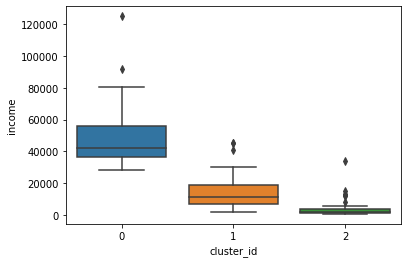

In [97]:
#checking the distriution of income data wrt clusters by putting the boxplot
sns.boxplot(x = 'cluster_id', y = 'income', data = final_country_data)

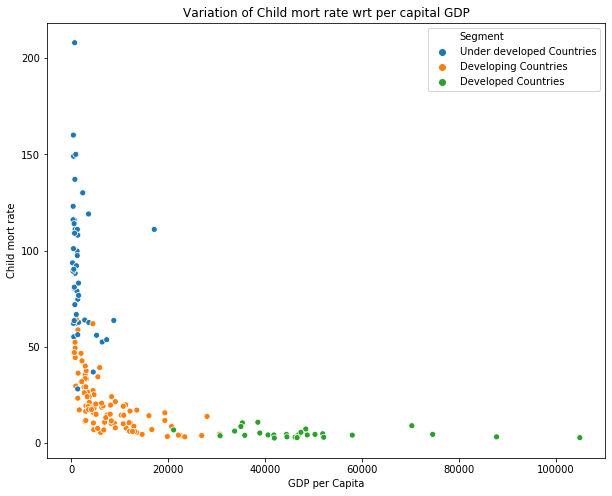

In [98]:
#Plotting the scatter plot for the final_country_data to find the relation b/w gdpp and childmort and their distribution wrt varios clusters
fig = plt.figure(figsize = (10,8))
sns.scatterplot(x='gdpp',y='child_mort',hue='Segment',legend='full',data=final_country_data)
plt.xlabel('GDP per Capita')
plt.ylabel('Child mort rate')
plt.title('Variation of Child mort rate wrt per capital GDP')
plt.show()

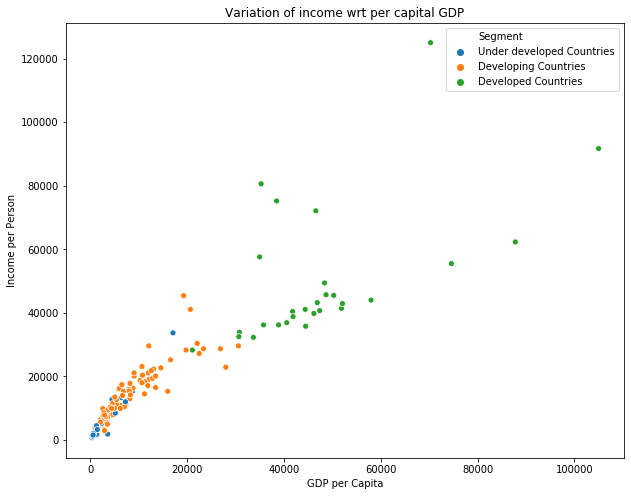

In [99]:
#Plotting the scatter plot for the final_country_data to find the relation b/w gdpp and income and their distribution wrt varios clusters
fig = plt.figure(figsize = (10,8))
sns.scatterplot(x='gdpp',y='income',hue='Segment',legend='full',data=final_country_data)
plt.xlabel('GDP per Capita')
plt.ylabel('Income per Person')
plt.title('Variation of income wrt per capital GDP')
plt.show()

In [100]:
#creating new dataframes wrt segment values
Developed_countries = final_country_data[final_country_data['Segment'] == 'Developed Countries']

In [101]:
#creating new dataframes wrt segment values
Developing_Countries = final_country_data[final_country_data['Segment'] == 'Developing Countries']
Under_developed_Countries = final_country_data[final_country_data['Segment'] == 'Under developed Countries']

In [102]:
#getting the data description
Under_developed_Countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,2.0
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,15.362485,6.384914,1.036192,2925.911009,0.0
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,2.0
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000,2.0
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000,2.0
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000,2.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,7.490000,17100.000000,2.0


In [103]:
#checking the dimension
Developed_countries.shape

(28, 12)

In [104]:
#checking the dimension
Developing_Countries.shape

(91, 12)

In [105]:
#checking the dimension
Under_developed_Countries.shape

(48, 12)

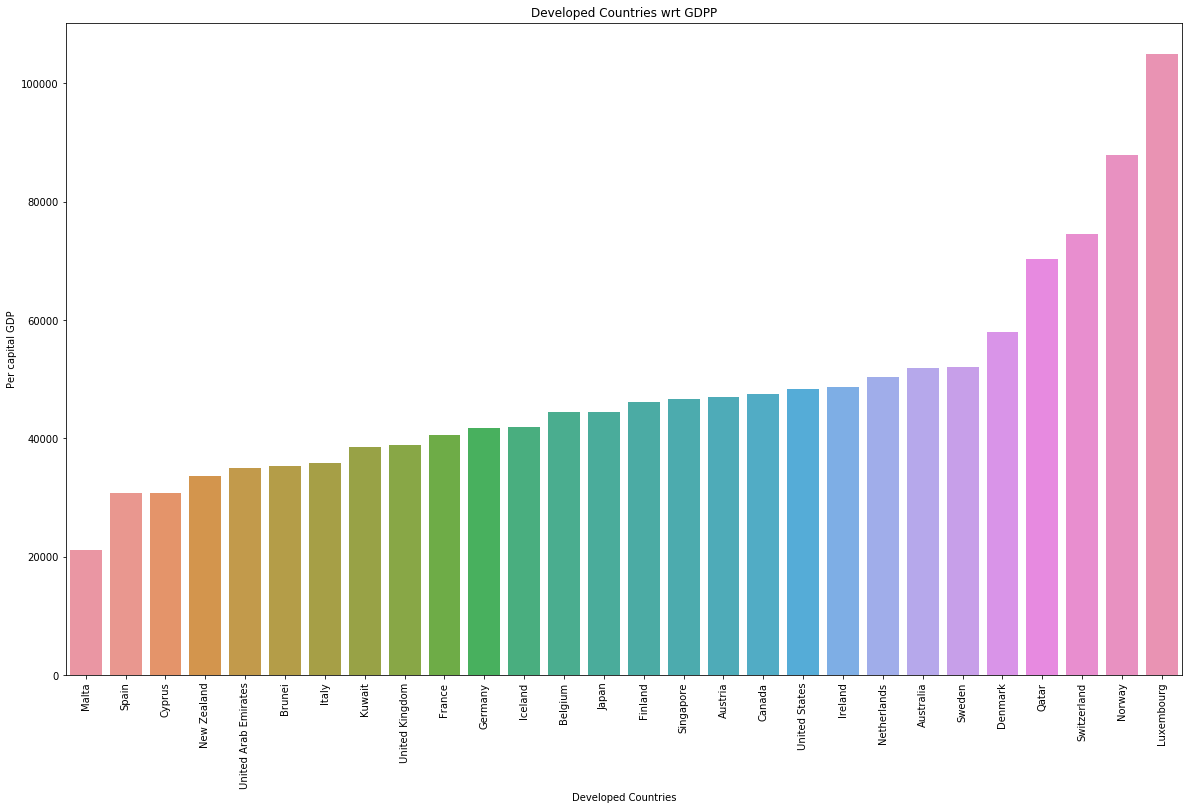

In [154]:
#Plotting the developed countries wrt their gdpp in ascending order 
plt.figure(figsize = (20,12))
df1 = Developed_countries.sort_values('gdpp')
s = sns.barplot(x = 'country', y = 'gdpp', data = df1)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Developed Countries')
plt.ylabel('Per capital GDP')
plt.title('Developed Countries wrt GDPP')
plt.show()

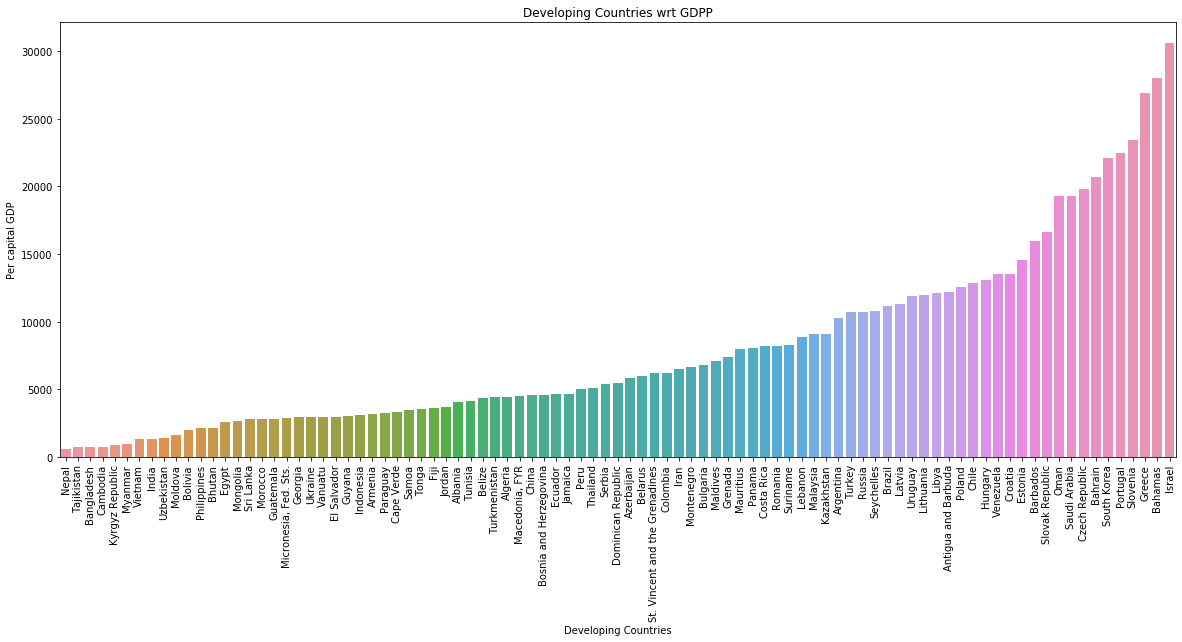

In [107]:
#Plotting the developing countries wrt their gdpp in ascending order 
plt.figure(figsize = (20,8))
df2 = Developing_Countries.sort_values('gdpp')
s = sns.barplot(x = 'country', y = 'gdpp', data = df2)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Developing Countries')
plt.ylabel('Per capital GDP')
plt.title('Developing Countries wrt GDPP')
plt.show()

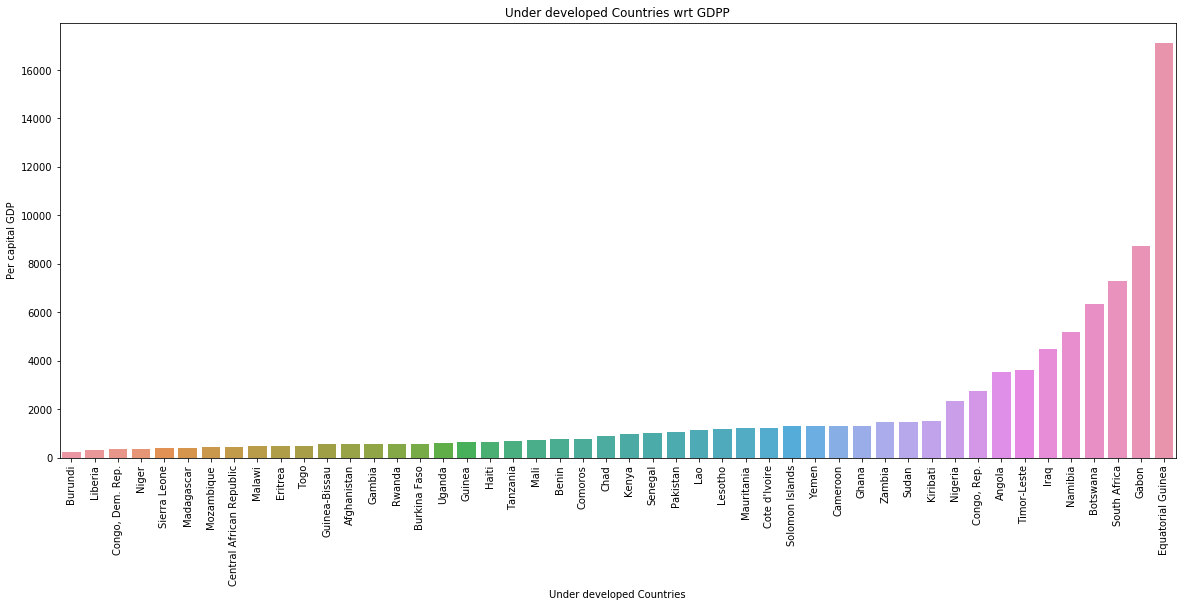

In [108]:
#Plotting the under developed countries wrt their gdpp in ascending order 
plt.figure(figsize = (20,8))
df3 = Under_developed_Countries.sort_values('gdpp')
s = sns.barplot(x = 'country', y = 'gdpp', data = df3)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Under developed Countries')
plt.ylabel('Per capital GDP')
plt.title('Under developed Countries wrt GDPP')
plt.show()

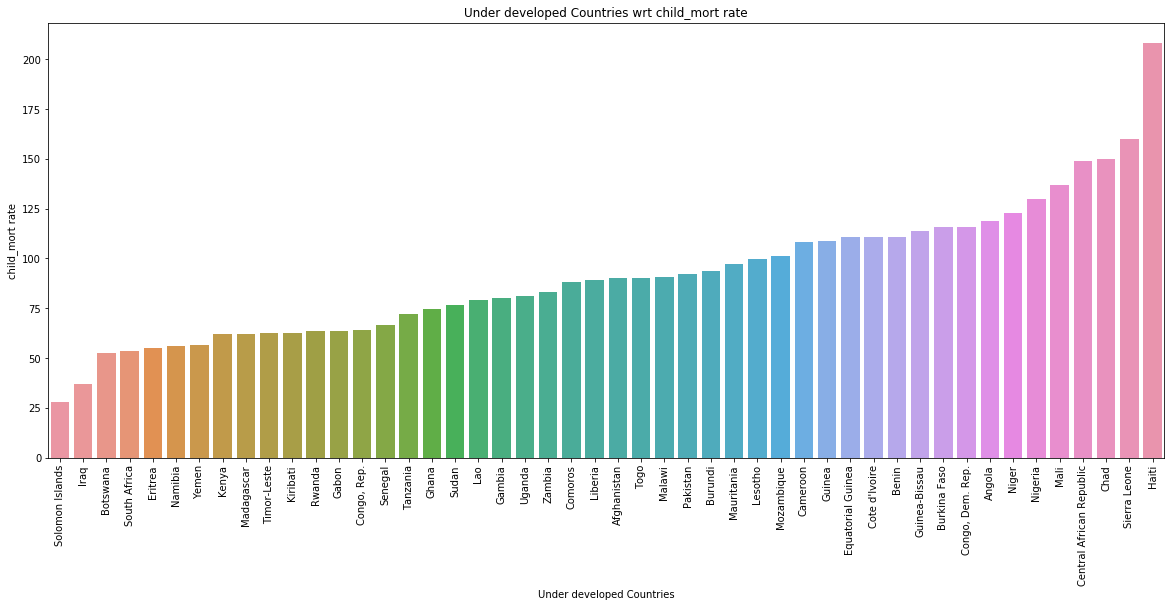

In [109]:
#Plotting the under developed countries wrt their child mort rate in ascending order 
plt.figure(figsize = (20,8))
df31 = Under_developed_Countries.sort_values('child_mort')
s = sns.barplot(x = 'country', y = 'child_mort', data = df31)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Under developed Countries')
plt.ylabel('child_mort rate')
plt.title('Under developed Countries wrt child_mort rate')
plt.show()

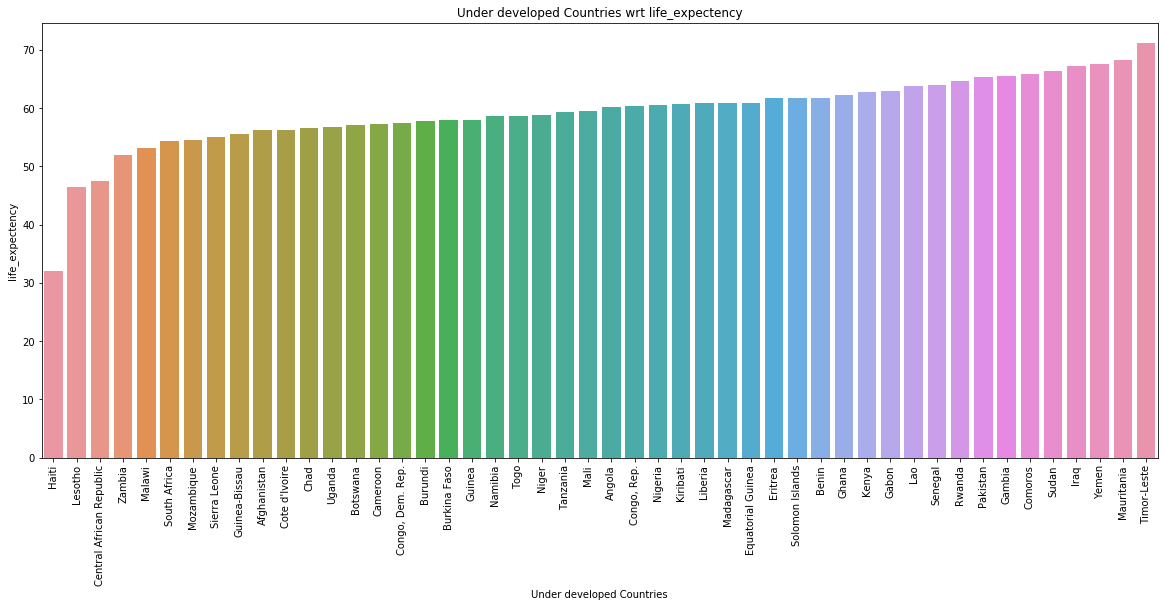

In [155]:
#Plotting the under developed countries wrt their life expectency rate in ascending order 
plt.figure(figsize = (20,8))
df31 = Under_developed_Countries.sort_values('life_expec')
s = sns.barplot(x = 'country', y = 'life_expec', data = df31)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Under developed Countries')
plt.ylabel('life_expectency')
plt.title('Under developed Countries wrt life_expectency')
plt.show()

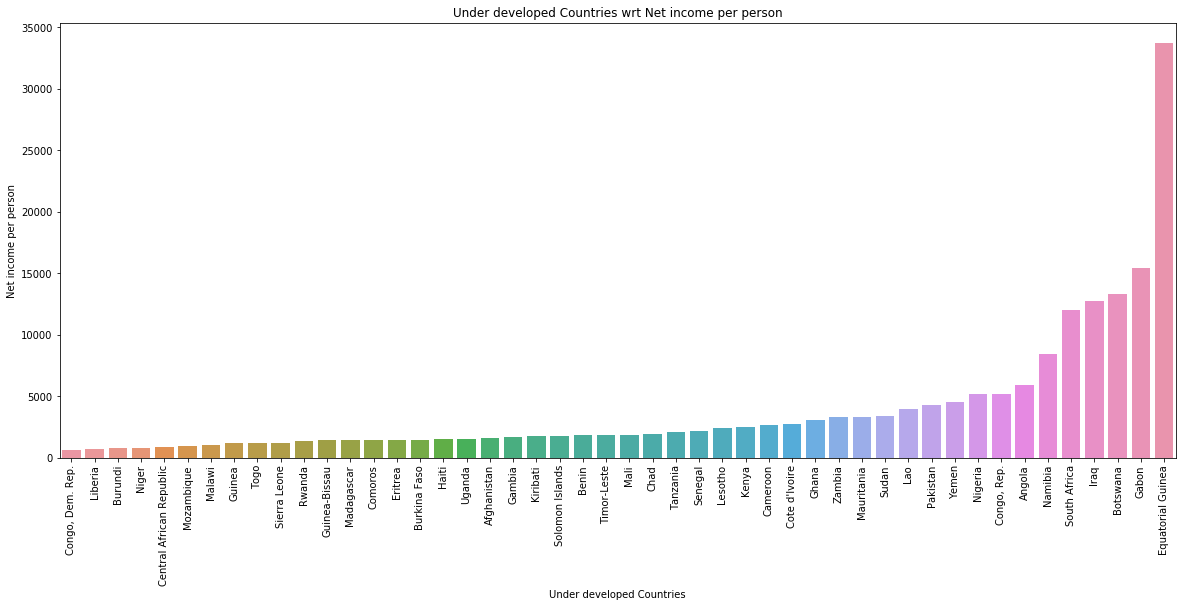

In [111]:
#Plotting the under developed countries wrt their income in ascending order 
plt.figure(figsize = (20,8))
df32 = Under_developed_Countries.sort_values('income')
s = sns.barplot(x = 'country', y = 'income', data = df32)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Under developed Countries')
plt.ylabel('Net income per person')
plt.title('Under developed Countries wrt Net income per person')
plt.show()

In [112]:
#describing the data
Under_developed_Countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,2.0
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,15.362485,6.384914,1.036192,2925.911009,0.0
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,2.0
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000,2.0
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000,2.0
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000,2.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,7.490000,17100.000000,2.0


In [113]:
#filtering the under developed countries dataset wrt GDPP 
Under_developed_Countries_df1 = Under_developed_Countries[Under_developed_Countries['gdpp'] < 1910]

In [114]:
#filtering the under developed countries dataset wrt child mort rate
Under_developed_Countries_df2 = Under_developed_Countries_df1[Under_developed_Countries_df1['child_mort'] > 91]

In [115]:
#filtering the under developed countries dataset wrt income 
Under_developed_Countries_df3 = Under_developed_Countries_df2[Under_developed_Countries_df2['income'] < 3899]

In [147]:
#describing the dataset
Under_developed_Countries_df3.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,123.747059,213.279835,43.975647,333.308235,1611.352941,7.989706,55.335294,5.471176,698.352941,2.0
std,29.176320,187.106274,26.677977,274.763937,781.538942,6.497282,7.693174,1.074778,345.567638,0.0
min,93.600000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000,2.0
25%,108.000000,81.503000,26.796000,170.200000,918.000000,2.970000,55.000000,5.110000,419.000000,2.0
50%,114.000000,137.274000,38.755000,248.508000,1430.000000,5.450000,57.300000,5.340000,648.000000,2.0
75%,137.000000,290.820000,52.269000,390.195000,1930.000000,12.300000,58.000000,6.260000,897.000000,2.0
max,208.000000,617.320000,129.870000,1181.700000,3320.000000,20.800000,68.200000,7.490000,1310.000000,2.0


In [117]:
#checking the shape of the dataset
Under_developed_Countries_df3.shape()

(17, 12)

In [118]:
#getting the top countries wrt child mort rate
Top10_child_mort = Under_developed_Countries_df3.nlargest(10,'child_mort')

In [119]:
# visualizing the data
Top10_child_mort

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Segment
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.450,32.1,3.33,662,2,Under developed Countries
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.200,55.0,5.20,399,2,Under developed Countries
32,Chad,150.0,330.096,40.6341,390.195,1930,6.390,56.5,6.59,897,2,Under developed Countries
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.010,47.5,5.21,446,2,Under developed Countries
97,Mali,137.0,161.424,35.2584,248.508,1870,4.370,59.5,6.55,708,2,Under developed Countries
112,Niger,123.0,77.256,17.9568,170.868,814,2.550,58.8,7.49,348,2,Under developed Countries
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,2,Under developed Countries
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.800,57.5,6.54,334,2,Under developed Countries
64,Guinea-Bissau,114.0,81.503,46.4950,192.544,1390,2.970,55.6,5.05,547,2,Under developed Countries
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,2,Under developed Countries


In [120]:
# getting the countries with least gdpp value
least_gdpp = Under_developed_Countries_df3.nsmallest(10,'gdpp')

In [121]:
#checking the dataset
least_gdpp

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Segment
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2,Under developed Countries
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2,Under developed Countries
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2,Under developed Countries
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2,Under developed Countries
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2,Under developed Countries
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2,Under developed Countries
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2,Under developed Countries
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575,2,Under developed Countries
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,2,Under developed Countries
66,Haiti,208.0,101.2860,45.7442,428.314,1500,5.45,32.1,3.33,662,2,Under developed Countries


In [122]:
#getting the countries with least income rate
least_income = Under_developed_Countries_df3.nsmallest(10,'income')

In [123]:
#visualizing the dataset
least_income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Segment
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2,Under developed Countries
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2,Under developed Countries
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2,Under developed Countries
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2,Under developed Countries
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2,Under developed Countries
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,2,Under developed Countries
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2,Under developed Countries
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2,Under developed Countries
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575,2,Under developed Countries
66,Haiti,208.0,101.2860,45.7442,428.314,1500,5.45,32.1,3.33,662,2,Under developed Countries


In [124]:
#intersecting the 3 dataframes to find the countries with least GDPP, income and high child mort rate
f_country = np.intersect1d(least_income.country,np.intersect1d(least_gdpp.country,Top10_child_mort.country))

In [125]:
# displaying the countries
f_country

array(['Burkina Faso', 'Central African Republic', 'Congo, Dem. Rep.',
       'Guinea-Bissau', 'Haiti', 'Niger', 'Sierra Leone'], dtype=object)

##The above mentiones are the 8 countries with highest need for aid from k means clustering method

'Hierarchical clustering'

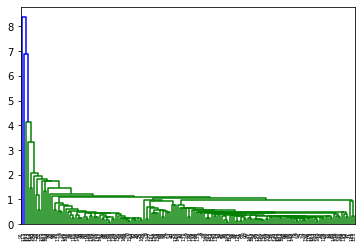

In [126]:
#'Hierarchical clustering' with single linkage
mergings=linkage(PCA_countrydata_df,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

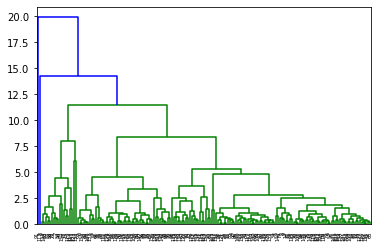

In [127]:
#'Hierarchical clustering' with complete linkage
mergings=linkage(PCA_countrydata_df,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [128]:
#cuttimg the tree at k = 3
cut_tree(mergings,n_clusters=3).shape

(167, 1)

In [129]:
# reshaping the data
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [130]:
#adding the cluster labels from Hierarchical clustering method to the PCA_countrydata_df dataframe
PCA_countrydata_df['cluster_labels'] = cluster_labels
PCA_countrydata_df.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id,cluster_labels
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1,0


In [131]:
# merging the datasets
PCA_countrydata_Heir = pd.merge(country_data,PCA_countrydata_df,left_index = True, right_index = True)

In [132]:
#checking the dataframe
PCA_countrydata_Heir.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723472,2.174966,0.597397,0.417695,0.056694,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1,0


In [133]:
#Dropping the PC columns
PCA_countrydata_Heir_d = PCA_countrydata_Heir.drop(['PC1','PC2','PC3','PC4','PC5'], axis = 1)

In [134]:
#getting the mean of the 3 columns and assigning them to a dataframe
child_mort_mean_heir = pd.DataFrame(PCA_countrydata_Heir_d.groupby(['cluster_labels']).child_mort.mean())
income_mean_heir = pd.DataFrame(PCA_countrydata_Heir_d.groupby(['cluster_labels']).income.mean())
gdpp_mean_heir = pd.DataFrame(PCA_countrydata_Heir_d.groupby(['cluster_labels']).gdpp.mean())

In [135]:
# concating the dataframes
Country_data_mean = pd.concat([child_mort_mean_heir,income_mean_heir,gdpp_mean_heir], axis = 1)

In [136]:
#checking the dataframe
Country_data_mean

,child_mort,income,gdpp
cluster_labels,,,
0,37.929091,16765.533333,12470.812121
1,2.800000,91700.000000,105000.000000
2,130.000000,5150.000000,2330.000000


In [137]:
# filtering the dataframe wrt GDPP, income and child mort columns
PCA_countrydata_Heir_df1 = PCA_countrydata_Heir_d[PCA_countrydata_Heir_d['gdpp'] <= 2330]
PCA_countrydata_Heir_df2 = PCA_countrydata_Heir_df1[PCA_countrydata_Heir_df1['child_mort'] >= 130]
PCA_countrydata_Heir_df3 = PCA_countrydata_Heir_df2[PCA_countrydata_Heir_df2['income'] <= 5150]

In [138]:
#checking the shape of the final dataset
PCA_countrydata_Heir_df3.shape

(6, 12)

In [139]:
#checking the dataset
PCA_countrydata_Heir_df3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,2,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,2,0
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,2,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,2,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330,2,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,2,0


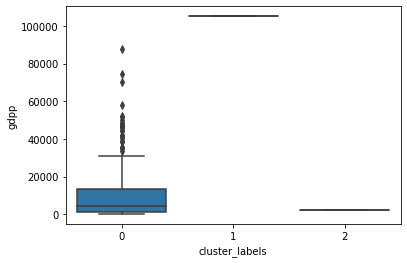

In [140]:
#checking the data distribution of gdpp wrt cluster labels
sns.boxplot(x='cluster_labels', y = 'gdpp', data = PCA_countrydata_Heir_d)
plt.show()

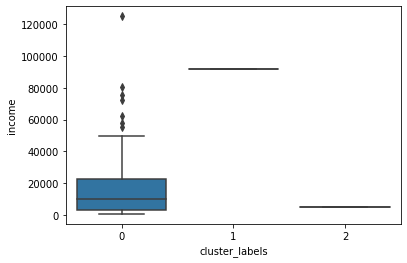

In [141]:
#checking the data distribution of income wrt cluster labels
sns.boxplot(x='cluster_labels', y = 'income', data = PCA_countrydata_Heir_d)
plt.show()

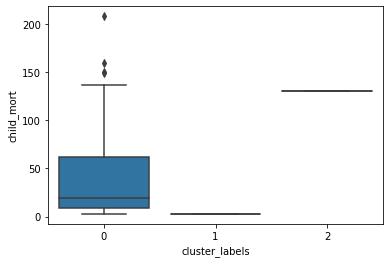

In [142]:
#checking the data distribution of child mort rate wrt cluster labels
sns.boxplot(x='cluster_labels', y = 'child_mort', data = PCA_countrydata_Heir_d)
plt.show()

In [144]:
PCA_countrydata_Heir_df3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,2,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,2,0
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,2,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,2,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330,2,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,2,0


from heirarchial clustering method we finally got 6 countries with high child mort rate, less gdpp and income